In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Machine Learning in Python\Achievement 2\Project Data'

In [3]:
df_weather = pd.read_csv(os.path.join(path, 'DATASET_weather_clean_1-10.csv'))
df_answers = pd.read_csv(os.path.join(path, 'DATASET_predictions.csv'))
df_weather.columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'BELGRADE_cloud_cover',
       ...
       'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity',
       'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=135)

In [4]:
df_answers = df_answers.drop(columns=['DATE'])
df_answers.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df_weather, df_answers, test_size=0.2, random_state=42)

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
clf.score(X_test, y_test)

0.7161220043572984

In [8]:
feature_importances = clf.feature_importances_
len(feature_importances)

135

In [9]:
# Step 1: Reshape the feature importances
reshaped_importances = feature_importances.reshape(-1, 15, 9) 

# Step 2: Aggregate importance for each weather station
station_importance = np.sum(reshaped_importances[0], axis=1)  # Collapse across features
print("Aggregated Importance per Weather Station:")
print(station_importance)

Aggregated Importance per Weather Station:
[0.08572786 0.05808777 0.07439507 0.0694543  0.10563553 0.06568403
 0.05426378 0.08137767 0.10876315 0.06993902 0.08189895 0.05021156
 0.02430675 0.04783999 0.02241457]


In [10]:
# Create a DataFrame for better visualization
stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL',
            'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

# Create a DataFrame for station importance
df_station_importance = pd.DataFrame({'Station': stations, 'Importance': station_importance}).sort_values(by='Importance', ascending=False)
print(df_station_importance)

       Station  Importance
8   MAASTRICHT    0.108763
4   DUSSELDORF    0.105636
0        BASEL    0.085728
10    MUNCHENB    0.081899
7    LJUBLJANA    0.081378
2     BUDAPEST    0.074395
9       MADRID    0.069939
3       DEBILT    0.069454
5     HEATHROW    0.065684
1     BELGRADE    0.058088
6       KASSEL    0.054264
11        OSLO    0.050212
13   STOCKHOLM    0.047840
12   SONNBLICK    0.024307
14    VALENTIA    0.022415


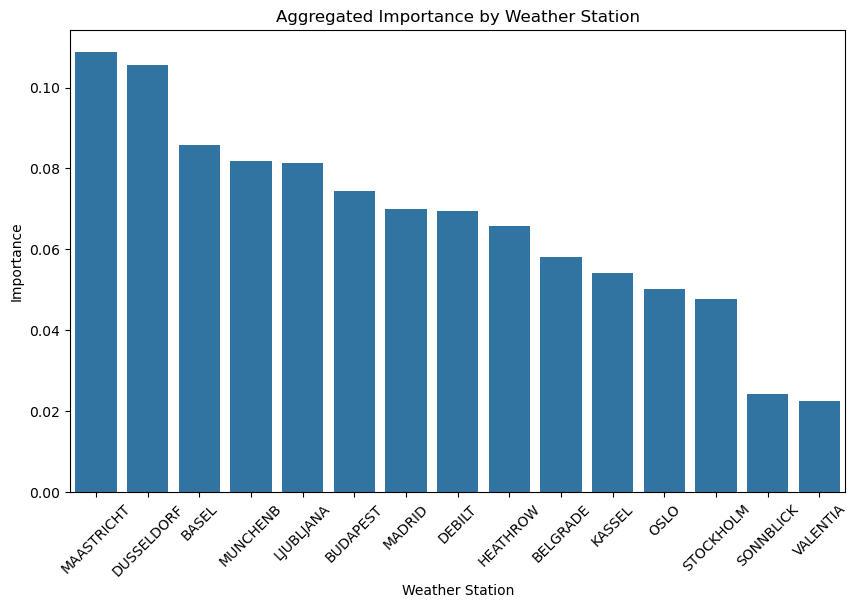

In [11]:
# Plot weather station importance
plt.figure(figsize=(10, 6))
#df_station_importance['Importance'].plot(kind='bar', x='Station')
sns.barplot(data=df_station_importance, x='Station', y='Importance')
plt.title("Aggregated Importance by Weather Station")
plt.xlabel("Weather Station")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [12]:
station = 'MAASTRICHT'
station_columns = [col for col in df_weather.columns if station in col]
station_columns

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [13]:
X = df_weather[station_columns]
y = df_answers[f'{station}_pleasant_weather']

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
clf.score(X_test, y_test)

1.0

In [17]:
features = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine',
            'temp_mean', 'temp_min', 'temp_max']

In [18]:
feature_importances = clf.feature_importances_
len(feature_importances)

9

In [19]:
# Create a DataFrame for feature importance
df_feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(df_feature_importance)

            Feature  Importance
4     precipitation    0.309211
8          temp_max    0.302635
6         temp_mean    0.115604
3  global_radiation    0.094635
5          sunshine    0.079420
0       cloud_cover    0.033430
1          humidity    0.027946
7          temp_min    0.022772
2          pressure    0.014346


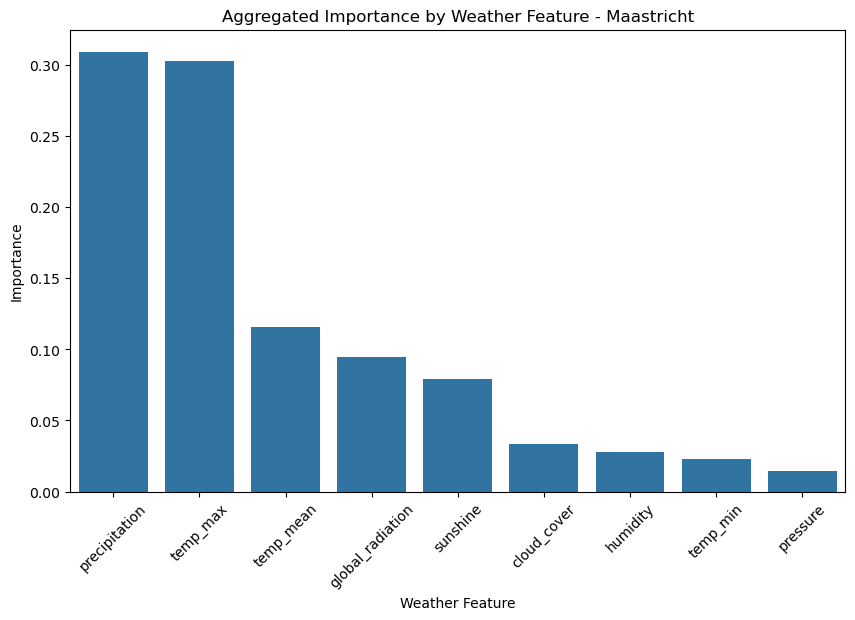

In [20]:
# Plot weather feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=df_feature_importance, x='Feature', y='Importance')
plt.title("Aggregated Importance by Weather Feature - Maastricht")
plt.xlabel("Weather Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [21]:
station = 'DUSSELDORF'
station_columns = [col for col in df_weather.columns if station in col]
station_columns

['DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max']

In [22]:
X = df_weather[station_columns]
y = df_answers[f'{station}_pleasant_weather']

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [25]:
features = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine',
            'temp_mean', 'temp_min', 'temp_max']

In [26]:
feature_importances = clf.feature_importances_
len(feature_importances)

9

In [27]:
# Create a DataFrame for feature importance
df_feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(df_feature_importance)

            Feature  Importance
4     precipitation    0.345482
8          temp_max    0.283143
6         temp_mean    0.105850
3  global_radiation    0.092072
5          sunshine    0.085493
0       cloud_cover    0.031744
7          temp_min    0.024753
1          humidity    0.019977
2          pressure    0.011487


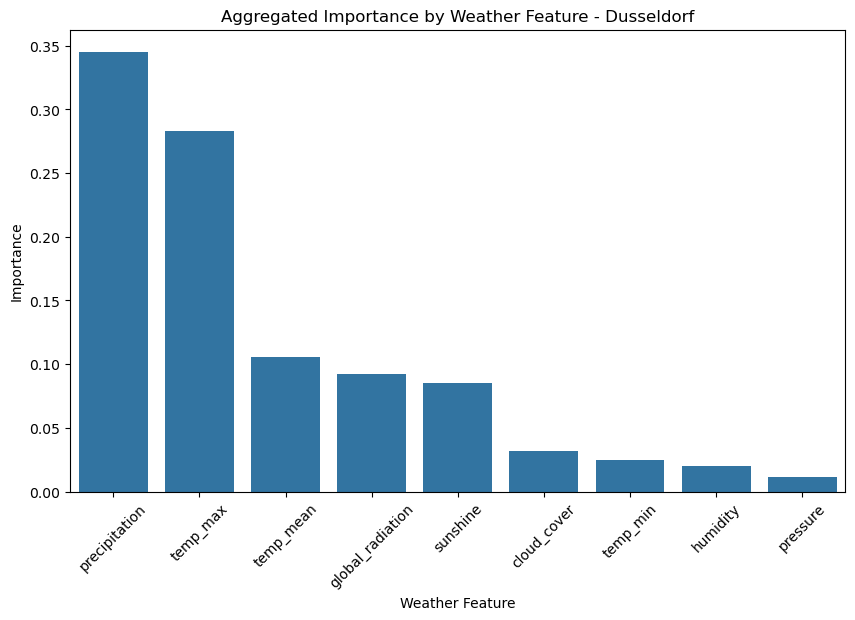

In [28]:
# Plot weather feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=df_feature_importance, x='Feature', y='Importance')
plt.title("Aggregated Importance by Weather Feature - Dusseldorf")
plt.xlabel("Weather Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

In [29]:
station = 'BASEL'
station_columns = [col for col in df_weather.columns if station in col]
station_columns

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [30]:
X = df_weather[station_columns]
y = df_answers[f'{station}_pleasant_weather']

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [33]:
features = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine',
            'temp_mean', 'temp_min', 'temp_max']

In [34]:
feature_importances = clf.feature_importances_
len(feature_importances)

9

In [35]:
# Create a DataFrame for feature importance
df_feature_importance = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(df_feature_importance)

            Feature  Importance
4     precipitation    0.350190
8          temp_max    0.278282
5          sunshine    0.115761
3  global_radiation    0.104069
6         temp_mean    0.082417
7          temp_min    0.032906
0       cloud_cover    0.019775
1          humidity    0.010082
2          pressure    0.006518


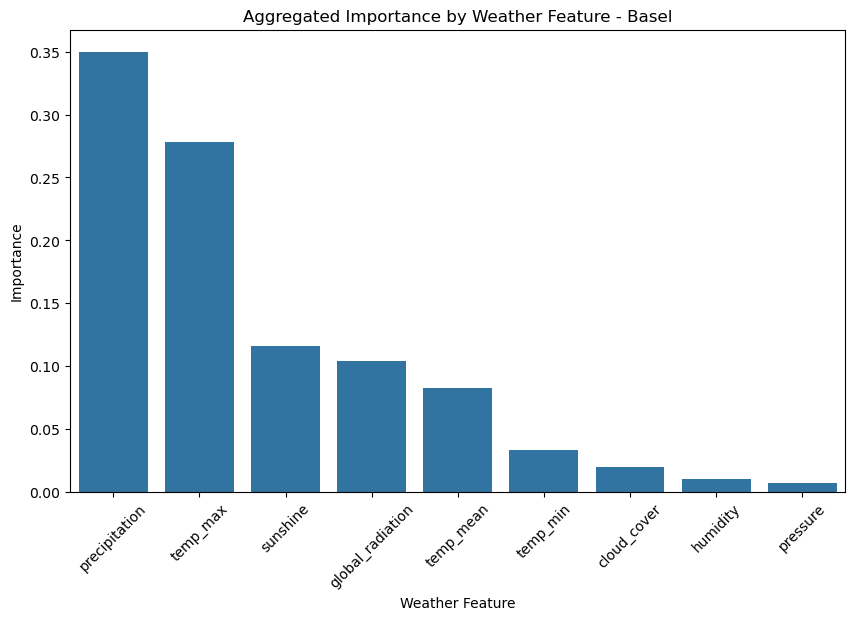

In [36]:
# Plot weather feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=df_feature_importance, x='Feature', y='Importance')
plt.title("Aggregated Importance by Weather Feature - Basel")
plt.xlabel("Weather Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()